# **Mini Project II : Classification Challenge**

Jun Park, Bryan Rachmat

02_modeling.ipynb

In [142]:
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
classification_report,
confusion_matrix,
roc_curve,
roc_auc_score,
precision_score,
recall_score,
f1_score,
ConfusionMatrixDisplay,
auc,
RocCurveDisplay,
)

# Load Data

In [143]:
df = pd.read_csv("../data/df.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate,st_depression,heart_disease,sex_1,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,...,exercise_induced_angina_1,st_slope_1,st_slope_2,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,num_major_vessels_4,thalassemia_1,thalassemia_2,thalassemia_3
0,52,125,212,168,1,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,140,203,155,3,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,145,174,125,2,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,148,203,161,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,138,294,106,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


# Models

In [144]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier()
}

# Model Training

In [145]:
X = df.drop('heart_disease', axis=1)
y = df['heart_disease']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(241, 22) (61, 22) (241,) (61,)


# Standardize Features

In [146]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [147]:
# train the models and report
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f'{name}:')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print('')


Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.78      0.86      0.82        29

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

[[25  7]
 [ 4 25]]

Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.66      0.75        32
           1       0.70      0.90      0.79        29

    accuracy                           0.77        61
   macro avg       0.79      0.78      0.77        61
weighted avg       0.79      0.77      0.77        61

[[21 11]
 [ 3 26]]

KNN:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        32
           1       0.75      0.83      0.79        29

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79    

# Hyperparameter Tuning

In [148]:
param_grid = {
    'n_estimators': [10, 25, 50, 100, 200], # Number of trees
    'max_depth': [10, 20, 100, None], # Maximum depth of trees
    'min_samples_split': [2, 5], # Minimum samples per split
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

print(f"Best Params: {grid_search.best_params_}")
print(f"Best F1 Score: {grid_search.best_score_:.4f}")

# update model
models["Random Forest (tuned)"] = grid_search.best_estimator_


Best Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 25}
Best F1 Score: 0.8370


Prioritize F1-score because it balances Precision and Recall, ensuring we don't miss sick patients (False Negatives) while not over-diagnosing healthy ones (False Positives).

In [152]:
models

{'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
 'Random Forest': RandomForestClassifier(random_state=42),
 'KNN': KNeighborsClassifier(),
 'Random Forest (tuned)': RandomForestClassifier(max_depth=10, n_estimators=25, random_state=42)}

# Model Evaluation

Logistic Regression:
confusion matrix:
 [[25  7]
 [ 4 25]]
classification report:
               precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.78      0.86      0.82        29

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Model AUC Score: 0.8621


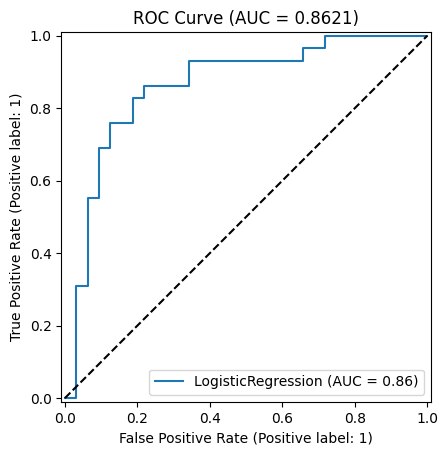


Random Forest:
confusion matrix:
 [[21 11]
 [ 3 26]]
classification report:
               precision    recall  f1-score   support

           0       0.88      0.66      0.75        32
           1       0.70      0.90      0.79        29

    accuracy                           0.77        61
   macro avg       0.79      0.78      0.77        61
weighted avg       0.79      0.77      0.77        61

Model AUC Score: 0.8728


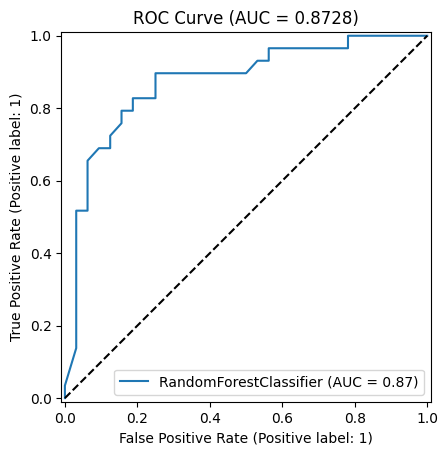


KNN:
confusion matrix:
 [[24  8]
 [ 5 24]]
classification report:
               precision    recall  f1-score   support

           0       0.83      0.75      0.79        32
           1       0.75      0.83      0.79        29

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61

Model AUC Score: 0.8653


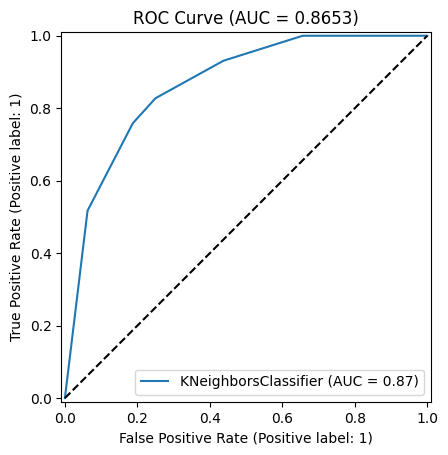


Random Forest (tuned):
confusion matrix:
 [[23  9]
 [ 3 26]]
classification report:
               precision    recall  f1-score   support

           0       0.88      0.72      0.79        32
           1       0.74      0.90      0.81        29

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61

Model AUC Score: 0.8669


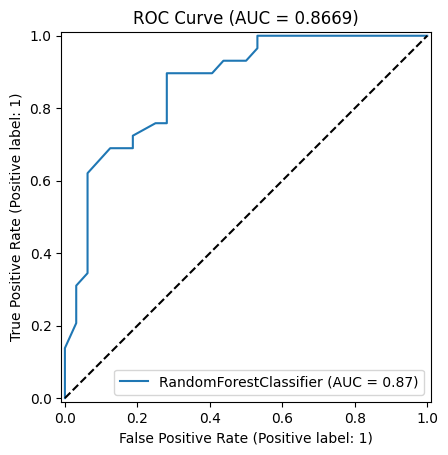

In [156]:
results = []
# train the models and report with new hyperparameters
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f'{name}:')
    print("confusion matrix:\n", confusion_matrix(y_test, y_pred))
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print("classification report:\n", classification_report(y_test, y_pred))

    # ROC AUC (Receiver Operating Characteristic Area Under the Curve)
    y_probs = model.predict_proba(X_test_scaled)[:, 1]
    roc_auc = roc_auc_score(y_test, y_probs)
    print(f"Model AUC Score: {roc_auc:.4f}")
    RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')
    plt.title(f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.show()

    # save the result
    results.append({
        'model': name,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc auc': roc_auc
    })
    print('')


# Model Comparison

In [157]:
results_df = pd.DataFrame(results).round(4)
results_df

,model,precision,recall,f1,roc auc
0,Logistic Regression,0.7812,0.8621,0.8197,0.8621
1,Random Forest,0.7027,0.8966,0.7879,0.8728
2,KNN,0.7500,0.8276,0.7869,0.8653
3,Random Forest (tuned),0.7429,0.8966,0.8125,0.8669


# Analysis

- What matters most?

    Recall is the Priority. False Negative (telling a sick patient they are healthy) casues biggest problem that could cost a life.

    Precision also matters. False Positive (telling a healthy patient they are sick) causes problems that lead to emotional stress and unnecessary, expensive medical tests.

    To account for both, we need to use the F1 score.

- Business implications

    False Negative: delayed treatment, higher potential for death. It could lead the patient to sue the hospital.

    False Positive: unnecessary, expensive medical tests for the patient. It could increase the insurance cost for the record of diagnosis.

- Model selection with clear justification

    Logistic Regression

    Based on the result table. Logistic Regression got the highest f1 score which considered both recall and precision.

- Recommendations
    
    More data is needed to improve the model.

    We used 8:2 train test split, so we only had 61 test data out of 303 data. 

    Small number of confusion matrix data lead bigger difference in the final result of the metrics.